In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install swifter

     |████████████████████████████████| 647 kB 14.0 MB/s 
     |████████████████████████████████| 280 kB 66.9 MB/s 
     |████████████████████████████████| 136 kB 67.7 MB/s 
  Created wheel for swifter: filename=swifter-1.1.3-py3-none-any.whl size=13078 sha256=705a65edd33db3844db71f2828bcbbe1ffed99c4987feb79a65f1ca7bd6113e3
  Stored in directory: /root/.cache/pip/wheels/e8/1a/1b/46aa7b0fac16d3ce1bccaac14bfe4fad972642217ae78d8160
Successfully built swifter
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8


In [ ]:
%matplotlib inline
import pandas as pd
import gc
import os
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
from random import shuffle

In [ ]:
gc.enable()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/"
f = 'Copy of gsp_en_227-311.csv.zip'
data_en = pd.read_csv(os.path.join(path, f), lineterminator='\n', index_col=False)

In [ ]:
data_en.head(5)

,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,coordinates,favorite_count,extractedts,cleaned_text
0,134354649,kcgt816,NaN,Midwest,649,115,3654,2010-04-18 05:22:06,1501347677128339458,2022-03-09 00:02:34,948,#Ukraine: The Ukrainian forces captured three ...,"[{'text': 'Ukraine', 'indices': [15, 23]}]",NaN,0,2022-03-09 00:09:20.141641,ukrainian forces captured russian supply truck...
1,16439659,chancesr,"SAG-AFTRA actor. Relentless environmentalist, ...",West Hollywood,2887,1437,26949,2008-09-24 19:38:52,1501347677606268930,2022-03-09 00:02:34,10,"The banks, asset managers &amp; insurers finan...",[],NaN,0,2022-03-09 00:09:20.131810,banks asset managers insurers financing russi...
2,1500098000609284100,FlaGolfr,#BlueVoices * #ONEV1 Z27 * #DemVoice1 A * #45...,NaN,247,111,187,2022-03-05 13:19:08,1501347677744689153,2022-03-09 00:02:34,16,"Military and foreign policy experts say the ""Z...",[],NaN,0,2022-03-09 00:09:20.115286,military foreign policy experts letter apparen...
3,1251660359766888450,philosophylinks,Bot retweeting interesting links from #philoso...,NaN,1,457,165121,2020-04-18 23:54:30,1501347677942001665,2022-03-09 00:02:34,69,Watch Jeremy's full speech as part of yesterda...,"[{'text': 'Ukraine', 'indices': [102, 110]}]",NaN,0,2022-03-09 00:09:20.098682,watch jeremy speech yesterday international em...
4,1305130153970929665,ManMaytag,💚 Liberal ❤️‍🔥,NaN,1033,427,31460,2020-09-13 13:08:30,1501347679170752518,2022-03-09 00:02:35,1,Disappointed Biden won’t allow Germany to acce...,"[{'text': 'Ukraine', 'indices': [55, 63]}]",NaN,0,2022-03-09 00:09:20.035605,disappointed biden won’t allow germany accept ...


# Processing and analysis with NLTK library
https://realpython.com/python-nltk-sentiment-analysis/#installing-and-importing

## Creating Frequency Distributions

In [ ]:
textLs = data_en['cleaned_text'].values

In [ ]:
nltk.download('punkt')
def freq(text):
    # tokenizes words
    words = nltk.word_tokenize(text)
    # lower case for all words longer than 3 chars, != amp
    # what does amp denote? why 3 chars?
    words=[word.lower() for word in words if word.isalpha() and not word == 'amp' and word.length()>3]
    fd = nltk.FreqDist(words)
    return fd

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# textStr = ' '.join(textLs)
# freqLs = freq(textStr)

In [ ]:
# print(freqLs.most_common(10))
# print(freqLs.tabulate(10))

## Extracting Concordance and Collocations

a concordance is a collection of word locations along with their context, can find  
1. How many times a word appears
2. Where each occurrence appears
3. What words surround each occurrence

In [ ]:
def concordanceText(text, word, num_line=5): 
    # returns a list of ConcordanceLine objects, which contain information about where each word occurs
    return text.concordance_list(word, num_line)

Collocations are series of words that frequently appear together in a given text

In [ ]:
def collocationFinder(text, n_word):
    # basically finding common n-grams
    if n_word == 2:
        finder = nltk.collocations.BigramCollocationFinder.from_words(text)
    elif n_word == 3:
        finder = nltk.collocations.TrigramCollocationFinder.from_words(text)
    elif n_word == 4:
        finder = nltk.collocations.QuadgramCollocationFinder.from_words(text)
    print(finder.ngram_fd.most_common(2))
    print(finder.ngram_fd.tabulate(2))
    return finder

## Using NLTK’s Sentiment Analyzer

### Pre-trained analyzer

In [ ]:
nltk.download('vader_lexicon')
# using nltk's vader implementation
# no need training data since pre trained

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
sia = SentimentIntensityAnalyzer()
sia.polarity_scores("Wow, NLTK is really powerful!")

{'compound': 0.8012, 'neg': 0.0, 'neu': 0.295, 'pos': 0.705}

In [ ]:
def nltk_prediction(x):
    try: 
        # compound polarity scores are combined/summed polarity scores of individual terms?
        polar = sia.polarity_scores(x)
        compound = polar["compound"]
        # consider printing the compound score to show intensity?
        if compound > 0:
            return 'positive', polar["pos"]
        elif compound < 0:
            return 'negative', polar["neg"]
        return 'neutral', polar["neu"]
    except Exception:
        print(x)
        return "none", 0.00

In [ ]:
import swifter
# removes na rows, applies sentimental analysis to remaining rows
data_nltk = data_en.dropna(subset=['cleaned_text'])
data_nltk["sentiment"], data_nltk["polarity_score"] =  zip(*data_nltk["cleaned_text"].swifter.apply(nltk_prediction))

Pandas Apply:   0%|          | 0/4004608 [00:00<?, ?it/s]

In [ ]:
# prints random sample of results
# seems fairly accurate except for the first tweet
for i in range(300,305):
    print("text:",data_nltk.iloc[i]['text'])
    print("sentiment:",data_nltk.iloc[i]['sentiment'],"\n---------------")

text: URGENT! An owner of a pet hotel in #Kiev was left with 67 cats/dogs who’s owners never returned. She will NOT abandon them. We urgently need a rescue back up at either the #Romania or #Poland border with #Ukraine. Transport is not yet 100% confirmed. #UkraineRussianWar #Rescue https://t.co/F5zrHMOZch
sentiment: positive 
---------------
text: The People's Convoy was a protest about what? Was it about #freedumb?

Shouldn't the #TruckersGoHome? Its #dumb! Pandemic restrictions are being lifted. #SCOTUS has ruled against vaccine mandates.

#TruckersConvoy2022
#Truckersforfreedomconvoy2022 
#StandWithUkraine 

#DemVoice1 https://t.co/zv3auUTUDZ
sentiment: negative 
---------------
text: Great to see @Starbucks and @McDonalds close in Russia.

#StandwithUkraine https://t.co/4csexBTXMm
sentiment: positive 
---------------
text: Leonardo DiCaprio donated $10M to support Ukraine…here he is with his grandmother that was born in Odessa, Ukraine https://t.co/ETqkJ0d9gF

#StandWithUkraine ht

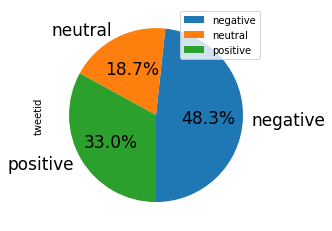

In [ ]:
# groups by sentiment and displays relative proportions
# tweets are mostly negative, but attitudes towards russia/ukraine cannot be determined
data_nltk.groupby(['sentiment']).sum().plot(kind='pie', y="tweetid", autopct='%1.1f%%', startangle=270, fontsize=17)

In [ ]:
# writes results of nltk to csv
filename = 'nltk_227-311.csv.zip'
data_nltk.to_csv(os.path.join(path, filename),compression="zip",index=False)

### Customizing NLTK’s Sentiment Analysis

#### Selecting Useful Features

e.g. Select frequent positive and negative words from tagged reviews

In [ ]:
nltk.download('stopwords')
nltk.download('names')
nltk.download('movie_reviews')
nltk.download('averaged_perceptron_tagger')

# useful data: positive, negative words from tagged reviews

# define unwanted words as stopwords and names
unwanted = nltk.corpus.stopwords.words("english")
unwanted.extend([w.lower() for w in nltk.corpus.names.words()])

# function to filter unwanted words, returns false for words to skip, otherwise true
def skip_unwanted(pos_tuple):
    word, tag = pos_tuple
    if not word.isalpha() or word in unwanted:
        return False
    # NN is the default POS tag, not informative so should skip
    if tag.startswith("NN"):
        return False
    return True

# gets positive and negative words from pos, neg categories after filtering unwanted words
positive_words = [word for word, tag in filter(
    skip_unwanted,
    nltk.pos_tag(nltk.corpus.movie_reviews.words(categories=["pos"])))]
negative_words = [word for word, tag in filter(
    skip_unwanted,
    nltk.pos_tag(nltk.corpus.movie_reviews.words(categories=["neg"]))
)]

# freq dist
positive_fd = nltk.FreqDist(positive_words)
negative_fd = nltk.FreqDist(negative_words)

# removes common words in positive and negative sets
common_set = set(positive_fd).intersection(negative_fd)

for word in common_set:
    del positive_fd[word]
    del negative_fd[word]

# displays top 100 pos, neg words
top_100_positive = {word for word, count in positive_fd.most_common(100)}
top_100_negative = {word for word, count in negative_fd.most_common(100)}

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


e.g. Build bigram finders from tagged reviews

In [ ]:
# useful data: pos, neg bigrams from tagged reviews
# defines unwanted words as stopwords + names
unwanted = nltk.corpus.stopwords.words("english")
unwanted.extend([w.lower() for w in nltk.corpus.names.words()])

# collocations are n-grams
# gets pos, neg bigrams from movie reviews, filters for unwanted words
positive_bigram_finder = nltk.collocations.BigramCollocationFinder.from_words([
    w for w in nltk.corpus.movie_reviews.words(categories=["pos"])
    if w.isalpha() and w not in unwanted
])
negative_bigram_finder = nltk.collocations.BigramCollocationFinder.from_words([
    w for w in nltk.corpus.movie_reviews.words(categories=["neg"])
    if w.isalpha() and w not in unwanted
])

#### Training and Using a Classifier

return a dictionary, and it will create three features for each piece of text:  
1. The average compound score
2. The average positive score
3. The amount of words in the text that are also part of the top 100 words in all positive reviews

In [ ]:
from statistics import mean
def extract_features(text):
    # features for each text (handcrafted):
    # average compound score of a sentence
    # average positive score of a sentence
    # percentage of words in text that are top 100 positive words
    features = dict()
    wordcount = 0
    compound_scores = list()
    positive_scores = list()

    for sentence in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sentence):
            if word.lower() in top_100_positive:
                wordcount += 1
        compound_scores.append(sia.polarity_scores(sentence)["compound"])
        positive_scores.append(sia.polarity_scores(sentence)["pos"])

    # Adding 1 to the final compound score to always have positive numbers
    # since some classifiers you'll use later don't work with negative numbers.
    try:
      features["mean_compound"] = mean(compound_scores) + 1
      features["mean_positive"] = mean(positive_scores)
      features["wordcount"] = wordcount
    except:
      features["mean_compound"] = 1
      features["mean_positive"] = 0
      features["wordcount"] = wordcount

    return features

In [ ]:
# positive and negative features
features = [
    # get features for each positive review
    (extract_features(nltk.corpus.movie_reviews.raw(review)), "pos")
    for review in nltk.corpus.movie_reviews.fileids(categories=["pos"])
]
features.extend([
    # features are focused on positive words, but we also use them on negative texts
    (extract_features(nltk.corpus.movie_reviews.raw(review)), "neg")
    for review in nltk.corpus.movie_reviews.fileids(categories=["neg"])
])

train the classifier

In [ ]:
# using nltk naive bayes
# using first 25% features (movie reviews) as training data

train_count = len(features) // 4
shuffle(features) # no need to shuffle data? this line was not here originally
classifier = nltk.NaiveBayesClassifier.train(features[:train_count])
classifier.show_most_informative_features(10)

Most Informative Features
               wordcount = 2                 pos : neg    =      6.8 : 1.0
               wordcount = 3                 pos : neg    =      5.5 : 1.0
               wordcount = 4                 pos : neg    =      5.1 : 1.0
               wordcount = 0                 neg : pos    =      1.8 : 1.0
               wordcount = 1                 pos : neg    =      1.4 : 1.0
           mean_positive = 0.08418181818181818    pos : neg    =      1.0 : 1.0


In [ ]:
# shuffling data greatly increases accuracy, accuracy without shuffling is about 0.3
nltk.classify.accuracy(classifier, features[train_count:])

0.658

### Comparing Additional Classifiers

In [ ]:
from sklearn.naive_bayes import (
    BernoulliNB,
    ComplementNB,
    MultinomialNB,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import nltk

In [ ]:
# classifiers to be tested
classifiers = {
    "BernoulliNB": BernoulliNB(),
    "ComplementNB": ComplementNB(),
    "MultinomialNB": MultinomialNB(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "LogisticRegression": LogisticRegression(),
    "MLPClassifier": MLPClassifier(max_iter=1000),
    "AdaBoostClassifier": AdaBoostClassifier(),
}

In [ ]:
# extract features for positive and negative reviews
features = [
    (extract_features(nltk.corpus.movie_reviews.raw(review)), "pos")
    for review in nltk.corpus.movie_reviews.fileids(categories=["pos"])
]
features.extend([
    (extract_features(nltk.corpus.movie_reviews.raw(review)), "neg")
    for review in nltk.corpus.movie_reviews.fileids(categories=["neg"])
])

In [ ]:
# use first 25% of data as training data
train_count = len(features) // 4
# shuffle dataset before training
shuffle(features)

# train and test each classifier: MLP (perceptron) seems to have the best performance
for name, sklearn_classifier in classifiers.items():
    classifiers[name] = nltk.classify.SklearnClassifier(sklearn_classifier)
    classifiers[name].train(features[:train_count])
    accuracy = nltk.classify.accuracy(classifiers[name], features[train_count:])
    print(F"{accuracy:.2%} - {name}")

67.27% - BernoulliNB
67.27% - ComplementNB
67.27% - MultinomialNB
67.87% - KNeighborsClassifier
62.47% - DecisionTreeClassifier
68.93% - RandomForestClassifier
73.07% - LogisticRegression
73.00% - MLPClassifier
71.00% - AdaBoostClassifier


In [ ]:
# using vader on movie review dataset
predictions = [nltk_prediction(nltk.corpus.movie_reviews.raw(review))[0] for review in nltk.corpus.movie_reviews.fileids(categories=["pos"])]
predictions.extend([nltk_prediction(nltk.corpus.movie_reviews.raw(review))[0] for review in nltk.corpus.movie_reviews.fileids(categories=["neg"])])
predictions = [1 if x == 'positive' else 0 for x in predictions]
import sklearn
print(sklearn.metrics.accuracy_score(([1] * 1000) + ([0] * 1000), predictions))


0.6365


In [ ]:
data_nltk = data_en.dropna(subset=['cleaned_text'])

# data_nltk["sentiment"], data_nltk["polarity_score"] =  zip(*data_nltk["cleaned_text"].swifter.apply(nltk_prediction))
data_nltk["features"] =  data_nltk["cleaned_text"].swifter.apply(extract_features)

data_nltk["features"]


Pandas Apply:   0%|          | 0/4004608 [00:00<?, ?it/s]

0          {'mean_compound': 1.0, 'mean_positive': 0.0, '...
1          {'mean_compound': 0.40059999999999996, 'mean_p...
2          {'mean_compound': 0.22829999999999995, 'mean_p...
3          {'mean_compound': 0.24209999999999998, 'mean_p...
4          {'mean_compound': 0.1874, 'mean_positive': 0.1...
                                 ...                        
4004705    {'mean_compound': 1.0, 'mean_positive': 0.0, '...
4004706    {'mean_compound': 1.4019, 'mean_positive': 0.2...
4004707    {'mean_compound': 1.6705, 'mean_positive': 0.3...
4004708    {'mean_compound': 1.0, 'mean_positive': 0.0, '...
4004709    {'mean_compound': 0.6388, 'mean_positive': 0.0...
Name: features, Length: 4004608, dtype: object

In [ ]:
data_nltk["sentiment"] = data_nltk["features"].swifter.apply(classifiers["MLPClassifier"].classify)
# data_nltk["sentiment"]


Pandas Apply:   0%|          | 0/4004608 [00:00<?, ?it/s]

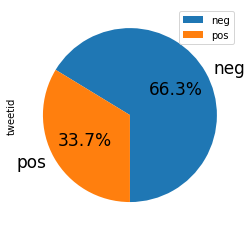

In [ ]:
data_nltk.groupby(['sentiment']).sum().plot(kind='pie', y="tweetid", autopct='%1.1f%%', startangle=270, fontsize=17)

In [ ]:
for i in range(200,400):
    print("text:",data_nltk.iloc[i]['text'])
    print("sentiment:",data_nltk.iloc[i]['sentiment'],"\n---------------")

text: #BreakingNews:
#Europe/an officials said they will NOT follow the #US steps in imposing sanctions on #Russia more than what they have already established.

In other words: We shot ourselves enough in the foot. No more place for another bullet &amp; we have accommodated enough the US.
sentiment: neg 
---------------
text: Be an ape:

collectively fund war efforts and (comedian) criminals who immediately turn around and dump on apes and be proud of themselves.

#braindead #NFT #Ukraine https://t.co/UFaGTaQ31v
sentiment: neg 
---------------
text: A German multi-billionaire has rented three hotels at the  Polish-German border for three+ months for #Ukraine refugees, turning meeting rooms into playrooms for children &amp; kindergarten teachers. Kitchens will provide a breakfast &amp; dinner buffet. Will likely cost him $5 million️
sentiment: neg 
---------------
text: How long will Americans poll at 70% for higher #gas ⛽️ in the name of #UkraineRussianWar ? I say keep it going as lon

In [ ]:
 data_nltk['cleaned_text'][:1].apply(extract_features)

In [ ]:
data_nltk['cleaned_text']

In [ ]:
# groups by sentiment and displays relative proportions
# tweets are mostly negative, but attitudes towards russia/ukraine cannot be determined
data_nltk.groupby(['sentiment']).sum().plot(kind='pie', y="tweetid", autopct='%1.1f%%', startangle=270, fontsize=17)

# TextBlob
https://textblob.readthedocs.io/en/dev/quickstart.html

In [ ]:
# using textblob
# pretrained model
# what is the underlying implementation of the model?
# seems to be either nltk naive bayes or pattern
# https://stackabuse.com/sentiment-analysis-in-python-with-textblob/

from textblob import TextBlob

## testing

In [ ]:
firstFive = textLs[:5]
blobFive = [TextBlob(t) for t in firstFive]
sentiments = [blob.sentiment for blob in blobFive]

In [ ]:
for i in range(5):
    print(firstFive[i])
    print(sentiments[i],"\n") # 0.0 is very objective and 1.0 is very subjective

## sentiment, apply to all

In [ ]:
def textblob_prediction(x):
    try:        
        blob = TextBlob(x)
        sentiment = blob.sentiment
        subjectivity = sentiment.subjectivity
        
        if subjectivity<=0.4:
            return "objective", sentiment.polarity
        elif subjectivity>=0.6:
            return "subjective", sentiment.polarity
        else:
            return "neutral", sentiment.polarity
    except Exception:
        print(x)
        return "none",0.00

In [ ]:
import swifter
data_tb = data_en.dropna(subset=['cleaned_text'])
data_tb["sentiment"], data_tb["polarity_score"] =  zip(*data_tb["cleaned_text"].swifter.apply(textblob_prediction))

In [ ]:
data_tb.head(5)

In [ ]:
data_tb.groupby(['sentiment']).sum().plot(kind='pie', y="tweetid", autopct='%1.1f%%', startangle=270, fontsize=17)

In [ ]:
filename = 'textblob_227-311.csv.zip'
data_tb.to_csv(os.path.join(path, filename),compression="zip",index=False)

## for some date

In [ ]:
f = 'textblob_227-311.csv.zip'
data_tb = pd.read_csv(os.path.join(path, f), lineterminator='\n', index_col=False)

In [ ]:
data_tb[(data_tb['tweetcreatedts'] >= '2022-02-27') & (data_tb['tweetcreatedts'] < '2022-02-28')].groupby(['sentiment']).sum().plot(kind='pie', y="tweetid", autopct='%1.1f%%', startangle=270, fontsize=17)

In [ ]:
data_tb[(data_tb['tweetcreatedts'] >= '2022-03-10') & (data_tb['tweetcreatedts'] < '2022-03-11')].groupby(['sentiment']).sum().plot(kind='pie', y="tweetid", autopct='%1.1f%%', startangle=270, fontsize=17)